In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

school_data = pd.read_csv('./uweso/school_data_drop_out_clean.csv')
school_data


,Year,District ID,Name of district,Title of respondent,Type of school,Total P1 Boys Enrollment,Total P1 Girls Enrollment,Total P2 Boys Enrollment,Total P2 Girls Enrollment,Total P3 Boys Enrollment,...,Is there a playfield?,Are there mid day meals?,Does the school have a talking compound?,Number of teachers housed within the school,Is there alibrary?,Is there a staffroom?,Total number of classrooms,Does the school have a class day?,Does the school hold sports day?,Does the school hold MDD ?
0,2015,322,AGAGO,1,Government,49.0,51.0,21.0,24.0,28.0,...,Yes,No,Yes,NaN,No,NaN,6.0,NaN,NaN,NaN
1,2015,322,AGAGO,2,Government,83.0,80.0,84.0,67.0,43.0,...,Yes,No,Yes,NaN,Yes,NaN,14.0,NaN,NaN,NaN
2,2015,322,AGAGO,2,Government,95.0,93.0,25.0,43.0,30.0,...,Yes,No,Yes,NaN,No,NaN,7.0,NaN,NaN,NaN
3,2015,322,AGAGO,2,Government,43.0,39.0,20.0,35.0,49.0,...,Yes,No,Yes,NaN,No,NaN,7.0,NaN,NaN,NaN
4,2015,322,AGAGO,3,Government,80.0,90.0,60.0,72.0,68.0,...,Yes,No,No,NaN,No,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11697,2015,314,ABIM,1,Government,74.0,61.0,42.0,38.0,49.0,...,Yes,Yes,Yes,NaN,No,NaN,4.0,NaN,NaN,NaN
11698,2015,314,ABIM,1,Government,84.0,100.0,59.0,65.0,89.0,...,Yes,Yes,Yes,NaN,No,NaN,6.0,NaN,NaN,NaN
11699,2015,314,ABIM,1,Government,119.0,97.0,75.0,73.0,103.0,...,Yes,Yes,Yes,NaN,Yes,NaN,6.0,NaN,NaN,NaN
11700,2015,314,ABIM,2,Government,42.0,36.0,13.0,11.0,14.0,...,Yes,Yes,No,NaN,No,NaN,6.0,NaN,NaN,NaN


In [148]:
districts = school_data["District ID"].nunique()
print("Total number of unique districts: ", districts)

Total number of unique districts:  112


In [149]:
school_data.drop(['Name of district', 'Title of respondent', 'Type of school', 'Total number of children with disabilities'], axis=1, inplace=True)
school_data

,Year,District ID,Total P1 Boys Enrollment,Total P1 Girls Enrollment,Total P2 Boys Enrollment,Total P2 Girls Enrollment,Total P3 Boys Enrollment,Total P3 Girls Enrollment,Total P4 Boys Enrollment,Total P4 Girls Enrollment,...,Is there a playfield?,Are there mid day meals?,Does the school have a talking compound?,Number of teachers housed within the school,Is there alibrary?,Is there a staffroom?,Total number of classrooms,Does the school have a class day?,Does the school hold sports day?,Does the school hold MDD ?
0,2015,322,49.0,51.0,21.0,24.0,28.0,25.0,38.0,33.0,...,Yes,No,Yes,NaN,No,NaN,6.0,NaN,NaN,NaN
1,2015,322,83.0,80.0,84.0,67.0,43.0,65.0,66.0,71.0,...,Yes,No,Yes,NaN,Yes,NaN,14.0,NaN,NaN,NaN
2,2015,322,95.0,93.0,25.0,43.0,30.0,25.0,36.0,41.0,...,Yes,No,Yes,NaN,No,NaN,7.0,NaN,NaN,NaN
3,2015,322,43.0,39.0,20.0,35.0,49.0,18.0,34.0,26.0,...,Yes,No,Yes,NaN,No,NaN,7.0,NaN,NaN,NaN
4,2015,322,80.0,90.0,60.0,72.0,68.0,62.0,53.0,55.0,...,Yes,No,No,NaN,No,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11697,2015,314,74.0,61.0,42.0,38.0,49.0,42.0,54.0,48.0,...,Yes,Yes,Yes,NaN,No,NaN,4.0,NaN,NaN,NaN
11698,2015,314,84.0,100.0,59.0,65.0,89.0,69.0,85.0,114.0,...,Yes,Yes,Yes,NaN,No,NaN,6.0,NaN,NaN,NaN
11699,2015,314,119.0,97.0,75.0,73.0,103.0,76.0,92.0,106.0,...,Yes,Yes,Yes,NaN,Yes,NaN,6.0,NaN,NaN,NaN
11700,2015,314,42.0,36.0,13.0,11.0,14.0,8.0,22.0,15.0,...,Yes,Yes,No,NaN,No,NaN,6.0,NaN,NaN,NaN


In [150]:
school_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11702 entries, 0 to 11701
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Year                                                        11702 non-null  int64  
 1   District ID                                                 11702 non-null  int64  
 2   Total P1 Boys Enrollment                                    11682 non-null  float64
 3   Total P1 Girls Enrollment                                   11691 non-null  float64
 4   Total P2 Boys Enrollment                                    11688 non-null  float64
 5   Total P2 Girls Enrollment                                   11690 non-null  float64
 6   Total P3 Boys Enrollment                                    11687 non-null  float64
 7   Total P3 Girls Enrollment                                   11692 non-null  float64
 

In [151]:
boolean_conversion = {'Yes': 1, 'No': 0, '0': 0, '': 0}
school_data['Does the school have a class day?'] = school_data['Does the school have a class day?'].map(boolean_conversion)
school_data['Is there a playfield?'] = school_data['Is there a playfield?'].map(boolean_conversion)
school_data['Does the school hold sports day?'] = school_data['Does the school hold sports day?'].map(boolean_conversion)
school_data[' Does the school hold MDD ?'] = school_data[' Does the school hold MDD ?'].map(boolean_conversion)
school_data['Is there a staffroom?'] = school_data['Is there a staffroom?'].map(boolean_conversion)
school_data['Is there alibrary?'] = school_data['Is there alibrary?'].map(boolean_conversion)
school_data['Is there  a sickbay?'] = school_data['Is there  a sickbay?'].map(boolean_conversion)
school_data['Is there a water source?'] = school_data['Is there a water source?'].map(boolean_conversion)
school_data['Is the school connected to any source of power?'] = school_data['Is the school connected to any source of power?'].map(boolean_conversion)
school_data['Are there mid day meals?'] = school_data['Are there mid day meals?'].map(boolean_conversion)
school_data['Does the school have a talking compound?'] = school_data['Does the school have a talking compound?'].map(boolean_conversion)


In [152]:
from sklearn.impute import SimpleImputer

# Create an imputer object with strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the school_data dataframe
imputer.fit(school_data)

# Transform the dataframe and store it in a new variable
school_data_imputed = imputer.transform(school_data)

school_data = pd.DataFrame.from_records(school_data_imputed, columns=school_data.columns)
school_data

,Year,District ID,Total P1 Boys Enrollment,Total P1 Girls Enrollment,Total P2 Boys Enrollment,Total P2 Girls Enrollment,Total P3 Boys Enrollment,Total P3 Girls Enrollment,Total P4 Boys Enrollment,Total P4 Girls Enrollment,...,Is there a playfield?,Are there mid day meals?,Does the school have a talking compound?,Number of teachers housed within the school,Is there alibrary?,Is there a staffroom?,Total number of classrooms,Does the school have a class day?,Does the school hold sports day?,Does the school hold MDD ?
0,2015.0,322.0,49.0,51.0,21.0,24.0,28.0,25.0,38.0,33.0,...,1.0,0.0,1.0,4.077698,0.0,0.492952,6.0,0.708007,0.877712,0.80012
1,2015.0,322.0,83.0,80.0,84.0,67.0,43.0,65.0,66.0,71.0,...,1.0,0.0,1.0,4.077698,1.0,0.492952,14.0,0.708007,0.877712,0.80012
2,2015.0,322.0,95.0,93.0,25.0,43.0,30.0,25.0,36.0,41.0,...,1.0,0.0,1.0,4.077698,0.0,0.492952,7.0,0.708007,0.877712,0.80012
3,2015.0,322.0,43.0,39.0,20.0,35.0,49.0,18.0,34.0,26.0,...,1.0,0.0,1.0,4.077698,0.0,0.492952,7.0,0.708007,0.877712,0.80012
4,2015.0,322.0,80.0,90.0,60.0,72.0,68.0,62.0,53.0,55.0,...,1.0,0.0,0.0,4.077698,0.0,0.492952,7.0,0.708007,0.877712,0.80012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11697,2015.0,314.0,74.0,61.0,42.0,38.0,49.0,42.0,54.0,48.0,...,1.0,1.0,1.0,4.077698,0.0,0.492952,4.0,0.708007,0.877712,0.80012
11698,2015.0,314.0,84.0,100.0,59.0,65.0,89.0,69.0,85.0,114.0,...,1.0,1.0,1.0,4.077698,0.0,0.492952,6.0,0.708007,0.877712,0.80012
11699,2015.0,314.0,119.0,97.0,75.0,73.0,103.0,76.0,92.0,106.0,...,1.0,1.0,1.0,4.077698,1.0,0.492952,6.0,0.708007,0.877712,0.80012
11700,2015.0,314.0,42.0,36.0,13.0,11.0,14.0,8.0,22.0,15.0,...,1.0,1.0,0.0,4.077698,0.0,0.492952,6.0,0.708007,0.877712,0.80012


In [153]:
school_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11702 entries, 0 to 11701
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Year                                                        11702 non-null  float64
 1   District ID                                                 11702 non-null  float64
 2   Total P1 Boys Enrollment                                    11702 non-null  float64
 3   Total P1 Girls Enrollment                                   11702 non-null  float64
 4   Total P2 Boys Enrollment                                    11702 non-null  float64
 5   Total P2 Girls Enrollment                                   11702 non-null  float64
 6   Total P3 Boys Enrollment                                    11702 non-null  float64
 7   Total P3 Girls Enrollment                                   11702 non-null  float64
 

<AxesSubplot:>

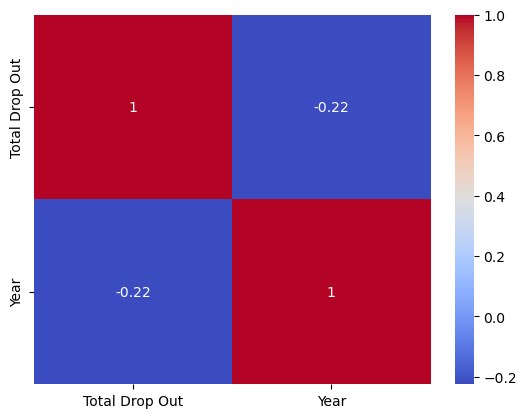

In [154]:
# Create a subset of data with total dropout and years columns
#In the case of total dropout and years, if the correlation coefficient is positive, it means that as the number of years increases, the total dropout rate also increases. This suggests that over time, more students are dropping out of school. On the other hand, if the correlation coefficient is negative, it means that as the number of years increases, the total dropout rate decreases. This suggests that over time, fewer students are dropping out of school

dropout_data = school_data[["Total Drop Out", "Year"]]

# Compute the correlation matrix
corr = dropout_data.corr()

# Draw the correlation matrix using seaborn's heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot:>

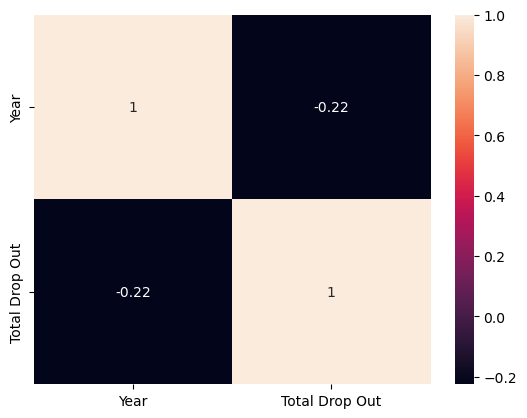

In [155]:
# Create a correlation matrix
corr_matrix = school_data[["Year", "Total Drop Out"]].corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True)

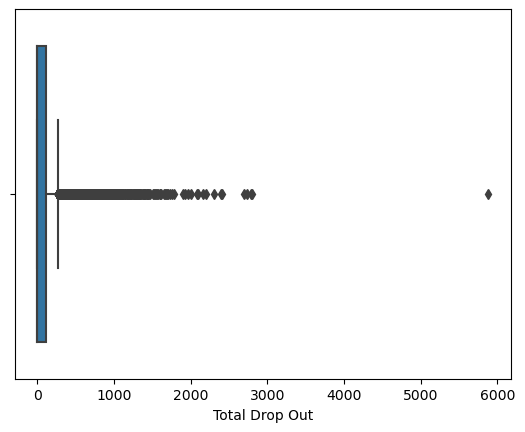

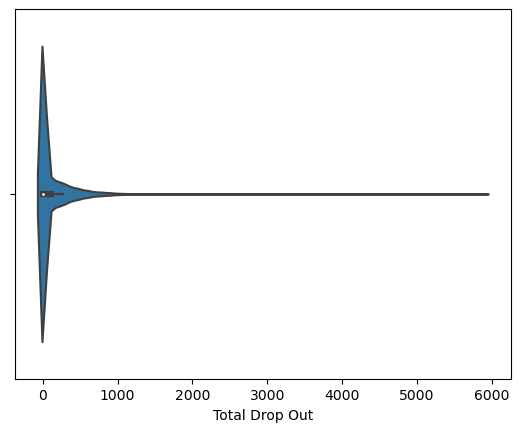

In [156]:
# Plot a box plot to visualize the outliers in the "total_dropout" column
sns.boxplot(x=school_data["Total Drop Out"])
plt.show()

# Plot a violin plot to visualize the distribution of the "total_dropout" column
sns.violinplot(x=school_data["Total Drop Out"])
plt.show()

<AxesSubplot:xlabel='Total Drop Out'>

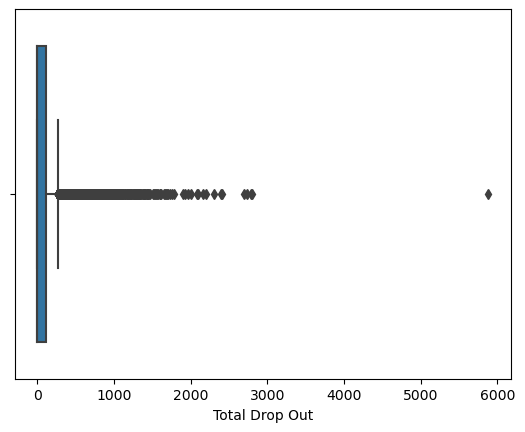

In [157]:
#Box plots of classes and total dropout
# Create a box plot of total drop out
sns.boxplot(x="Total Drop Out", data=school_data)


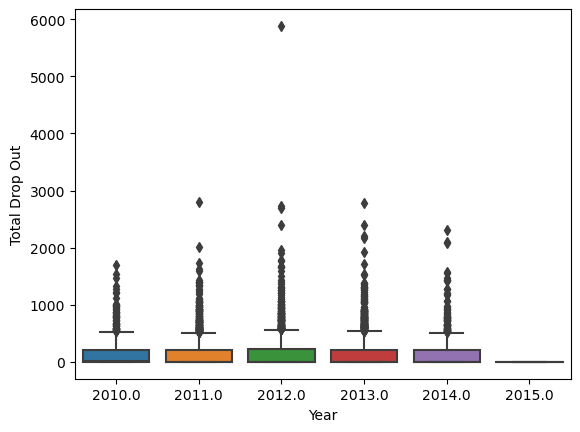

In [158]:
# Create a new column "total_enrollment" by summing up the enrollment of boys and girls

# Plot a box plot to visualize the distribution of "total_dropout" by "year" and "total_enrollment"
sns.boxplot(x="Year", y="Total Drop Out", data=school_data)
plt.show()

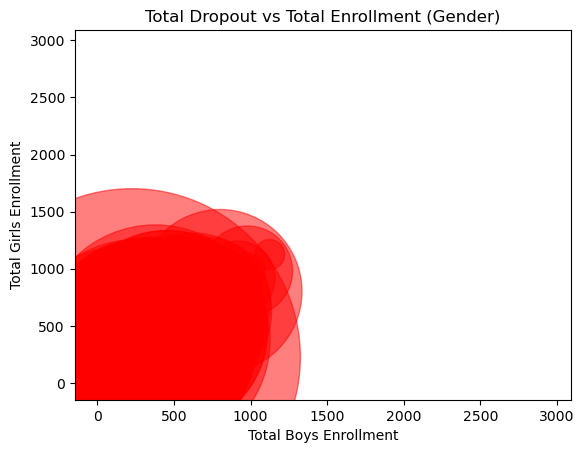

In [159]:
# Create the scatter plot
plt.scatter(school_data['Total Boys Enrollment'], school_data['Total Boys Enrollment'], s=school_data['Total Drop Out']*10, c='r', alpha=0.5)

# Add labels and title
plt.xlabel('Total Boys Enrollment')
plt.ylabel('Total Girls Enrollment')
plt.title('Total Dropout vs Total Enrollment (Gender)')

# Show the plot
plt.show()

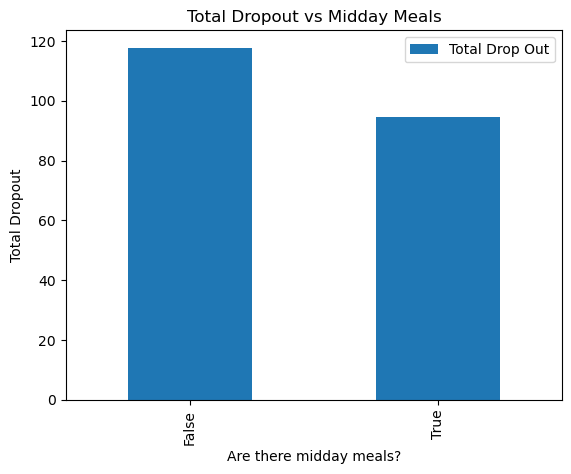

In [160]:
# Convert the "Are there midday meals?" column to boolean
school_data["Are there mid day meals?"] = school_data["Are there mid day meals?"].map({1: True, 0: False})

# Create a new DataFrame with the relevant columns
df_midday_meals = school_data[["Are there mid day meals?", "Total Drop Out"]]

# Group the data by "Are there midday meals?"
df_midday_meals = df_midday_meals.groupby("Are there mid day meals?").mean()

# Create the bar plot
df_midday_meals.plot(kind='bar', y='Total Drop Out')

# Add labels and title
plt.xlabel('Are there midday meals?')
plt.ylabel('Total Dropout')
plt.title('Total Dropout vs Midday Meals')

# Show the plot
plt.show()

In [161]:
school_data.to_csv('./uweso/school_data_clean.csv', index=False)

In [162]:
school_data = pd.read_csv('./uweso/school_data_clean.csv')
school_data

,Year,District ID,Total P1 Boys Enrollment,Total P1 Girls Enrollment,Total P2 Boys Enrollment,Total P2 Girls Enrollment,Total P3 Boys Enrollment,Total P3 Girls Enrollment,Total P4 Boys Enrollment,Total P4 Girls Enrollment,...,Is there a playfield?,Are there mid day meals?,Does the school have a talking compound?,Number of teachers housed within the school,Is there alibrary?,Is there a staffroom?,Total number of classrooms,Does the school have a class day?,Does the school hold sports day?,Does the school hold MDD ?
0,2015.0,322.0,49.0,51.0,21.0,24.0,28.0,25.0,38.0,33.0,...,1.0,False,1.0,4.077698,0.0,0.492952,6.0,0.708007,0.877712,0.80012
1,2015.0,322.0,83.0,80.0,84.0,67.0,43.0,65.0,66.0,71.0,...,1.0,False,1.0,4.077698,1.0,0.492952,14.0,0.708007,0.877712,0.80012
2,2015.0,322.0,95.0,93.0,25.0,43.0,30.0,25.0,36.0,41.0,...,1.0,False,1.0,4.077698,0.0,0.492952,7.0,0.708007,0.877712,0.80012
3,2015.0,322.0,43.0,39.0,20.0,35.0,49.0,18.0,34.0,26.0,...,1.0,False,1.0,4.077698,0.0,0.492952,7.0,0.708007,0.877712,0.80012
4,2015.0,322.0,80.0,90.0,60.0,72.0,68.0,62.0,53.0,55.0,...,1.0,False,0.0,4.077698,0.0,0.492952,7.0,0.708007,0.877712,0.80012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11697,2015.0,314.0,74.0,61.0,42.0,38.0,49.0,42.0,54.0,48.0,...,1.0,True,1.0,4.077698,0.0,0.492952,4.0,0.708007,0.877712,0.80012
11698,2015.0,314.0,84.0,100.0,59.0,65.0,89.0,69.0,85.0,114.0,...,1.0,True,1.0,4.077698,0.0,0.492952,6.0,0.708007,0.877712,0.80012
11699,2015.0,314.0,119.0,97.0,75.0,73.0,103.0,76.0,92.0,106.0,...,1.0,True,1.0,4.077698,1.0,0.492952,6.0,0.708007,0.877712,0.80012
11700,2015.0,314.0,42.0,36.0,13.0,11.0,14.0,8.0,22.0,15.0,...,1.0,True,0.0,4.077698,0.0,0.492952,6.0,0.708007,0.877712,0.80012


In [163]:
# Split the dataset in to 3 (Training, Evaluation, and Test Sets)
from sklearn.model_selection import  train_test_split
school_data = pd.read_csv('./uweso/school_data_clean.csv')
features = school_data.drop('Total Drop Out', axis=1)
labels = school_data['Total Drop Out']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

for dataset in [y_train, y_eval, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [164]:
# Write out all the split data to individuals files
X_train.to_csv('./uweso/data/train_features.csv', index=False)
X_eval.to_csv('./uweso/data/eval_features.csv', index=False)
X_test.to_csv('./uweso/data/test_features.csv', index=False)

y_train.to_csv('./uweso/data/train_labels.csv', index=False)
y_eval.to_csv('./uweso/data/eval_labels.csv', index=False)
y_test.to_csv('./uweso/data/test_labels.csv', index=False)

In [165]:
# Function to print results from the models
# def print_results(results):
#     print('BEST PARAMS: {}\n'.format(results.best_params_))
#
#     means = results.cv_results_['mean_test_score']
#     stds = results.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, results.cv_results_['params']):
#         print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))


# Function to print results from the models
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('MAE: {} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))


In [166]:
# RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

tr_features = pd.read_csv('./uweso/data/train_features.csv')
tr_labels = pd.read_csv('./uweso/data/train_labels.csv')

simple_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
simple_imputer.fit(tr_features)
tr_features = simple_imputer.transform(tr_features)

rf = RandomForestRegressor()
parameters = {
    'n_estimators': [5, 50, 250, 1000],
    'max_depth': [2, 4, 8, 16, 32, None],
}

# cv = StratifiedKFold()
# cv = RandomizedSearchCV(rf, param_distributions=parameters, n_jobs=-1, cv=5)
cv = GridSearchCV(rf, parameters, cv=3, n_jobs=-1)
# cv = cross_val_score(rf, parameters, cv= 3, n_jobs= -1)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 1000}

MAE: 0.134 (+/-0.014) for {'max_depth': 2, 'n_estimators': 5}
MAE: 0.134 (+/-0.01) for {'max_depth': 2, 'n_estimators': 50}
MAE: 0.133 (+/-0.013) for {'max_depth': 2, 'n_estimators': 250}
MAE: 0.133 (+/-0.012) for {'max_depth': 2, 'n_estimators': 1000}
MAE: 0.137 (+/-0.018) for {'max_depth': 4, 'n_estimators': 5}
MAE: 0.16 (+/-0.019) for {'max_depth': 4, 'n_estimators': 50}
MAE: 0.163 (+/-0.018) for {'max_depth': 4, 'n_estimators': 250}
MAE: 0.161 (+/-0.019) for {'max_depth': 4, 'n_estimators': 1000}
MAE: 0.114 (+/-0.082) for {'max_depth': 8, 'n_estimators': 5}
MAE: 0.183 (+/-0.025) for {'max_depth': 8, 'n_estimators': 50}
MAE: 0.186 (+/-0.024) for {'max_depth': 8, 'n_estimators': 250}
MAE: 0.188 (+/-0.026) for {'max_depth': 8, 'n_estimators': 1000}
MAE: -0.002 (+/-0.032) for {'max_depth': 16, 'n_estimators': 5}
MAE: 0.151 (+/-0.026) for {'max_depth': 16, 'n_estimators': 50}
MAE: 0.164 (+/-0.039) for {'max_depth': 16, 'n_estimators':

In [167]:
cv.best_estimator_

RandomForestRegressor(max_depth=8, n_estimators=1000)

In [168]:
joblib.dump(cv.best_estimator_, './uweso/models/RF_model.pkl')

['./uweso/models/RF_model.pkl']

### Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

tr_features = pd.read_csv('./uweso/data/train_features.csv')
tr_labels = pd.read_csv('./uweso/data/train_labels.csv')

simple_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
simple_imputer.fit(tr_features)
tr_features = simple_imputer.transform(tr_features)

# Standardize data by transforming it to have zero mean and unit variance (optimize convergence)
scaler = StandardScaler()
tr_features_scaled = scaler.fit_transform(tr_features)

lr = LogisticRegression()

parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [1000]

}

cv = GridSearchCV(lr, parameters, cv=2)
cv.fit(tr_features_scaled, tr_labels.values.ravel())

print_results(cv)

The least populated class in y has only 1 members, which is less than n_splits=2.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


BEST PARAMS: {'C': 0.001, 'max_iter': 1000}

MAE: 0.657 (+/-0.0) for {'C': 0.001, 'max_iter': 1000}
MAE: 0.657 (+/-0.0) for {'C': 0.01, 'max_iter': 1000}
MAE: 0.656 (+/-0.0) for {'C': 0.1, 'max_iter': 1000}
MAE: 0.64 (+/-0.005) for {'C': 1, 'max_iter': 1000}
MAE: 0.577 (+/-0.012) for {'C': 10, 'max_iter': 1000}


In [170]:
cv.best_estimator_

LogisticRegression(C=0.001, max_iter=1000)

In [171]:
joblib.dump(cv.best_estimator_, './uweso/models/LG_model.pkl')

['./uweso/models/LG_model.pkl']

In [172]:
from sklearn.neural_network import MLPRegressor

tr_features = pd.read_csv('./uweso/data/train_features.csv')
tr_labels = pd.read_csv('./uweso/data/train_labels.csv')

simple_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
simple_imputer.fit(tr_features)
tr_features = simple_imputer.transform(tr_features)

mlp = MLPRegressor()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5, n_jobs=-1)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}

MAE: 0.029 (+/-0.055) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
MAE: 0.05 (+/-0.054) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
MAE: 0.054 (+/-0.051) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
MAE: 0.064 (+/-0.07) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
MAE: 0.057 (+/-0.054) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
MAE: 0.053 (+/-0.072) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
MAE: 0.056 (+/-0.061) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
MAE: 0.066 (+/-0.046) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
MAE: 0.063 (+/-0.053) for {'activation':

In [173]:
cv.best_estimator_

MLPRegressor(learning_rate='invscaling')

In [174]:
joblib.dump(cv.best_estimator_, './uweso/models/MLP_model.pkl')

['./uweso/models/MLP_model.pkl']

In [175]:
from sklearn.svm import SVR

tr_features = pd.read_csv('./uweso/data/train_features.csv')
tr_labels = pd.read_csv('./uweso/data/train_labels.csv')

simple_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
simple_imputer.fit(tr_features)
tr_features = simple_imputer.transform(tr_features)

svc = SVR()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5, n_jobs= -1)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

MAE: -0.162 (+/-0.026) for {'C': 0.1, 'kernel': 'linear'}
MAE: -0.198 (+/-0.036) for {'C': 0.1, 'kernel': 'rbf'}
MAE: -0.085 (+/-0.057) for {'C': 1, 'kernel': 'linear'}
MAE: -0.198 (+/-0.036) for {'C': 1, 'kernel': 'rbf'}
MAE: -33.675 (+/-38.471) for {'C': 10, 'kernel': 'linear'}
MAE: -0.198 (+/-0.036) for {'C': 10, 'kernel': 'rbf'}


In [176]:
cv.best_estimator_

SVR(C=1, kernel='linear')

In [177]:
joblib.dump(cv.best_estimator_, './uweso/models/SVM_model.pkl')

['./uweso/models/SVM_model.pkl']

In [178]:
from sklearn.ensemble import HistGradientBoostingRegressor

tr_features = pd.read_csv('./uweso/data/train_features.csv')
tr_labels = pd.read_csv('./uweso/data/train_labels.csv')

simple_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
simple_imputer.fit(tr_features)
tr_features = simple_imputer.transform(tr_features)

gb = HistGradientBoostingRegressor()
parameters = {
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5, n_jobs=-1)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 5}

MAE: 0.071 (+/-0.018) for {'learning_rate': 0.01, 'max_depth': 1}
MAE: 0.135 (+/-0.026) for {'learning_rate': 0.01, 'max_depth': 3}
MAE: 0.171 (+/-0.034) for {'learning_rate': 0.01, 'max_depth': 5}
MAE: 0.185 (+/-0.045) for {'learning_rate': 0.01, 'max_depth': 7}
MAE: 0.187 (+/-0.043) for {'learning_rate': 0.01, 'max_depth': 9}
MAE: 0.143 (+/-0.027) for {'learning_rate': 0.1, 'max_depth': 1}
MAE: 0.201 (+/-0.049) for {'learning_rate': 0.1, 'max_depth': 3}
MAE: 0.209 (+/-0.048) for {'learning_rate': 0.1, 'max_depth': 5}
MAE: 0.198 (+/-0.055) for {'learning_rate': 0.1, 'max_depth': 7}
MAE: 0.187 (+/-0.055) for {'learning_rate': 0.1, 'max_depth': 9}
MAE: 0.143 (+/-0.041) for {'learning_rate': 1, 'max_depth': 1}
MAE: -0.056 (+/-0.155) for {'learning_rate': 1, 'max_depth': 3}
MAE: -0.385 (+/-0.356) for {'learning_rate': 1, 'max_depth': 5}
MAE: -0.458 (+/-0.433) for {'learning_rate': 1, 'max_depth': 7}
MAE: -0.496 (+/-0.312) for {'learning

In [179]:
cv.best_estimator_

HistGradientBoostingRegressor(max_depth=5)

In [180]:
joblib.dump(cv.best_estimator_, './uweso/models/GB_model.pkl')

['./uweso/models/GB_model.pkl']

## Summary: Compare model results and final model selection

In [181]:
from time import time

eval_features = pd.read_csv('./uweso/data/eval_features.csv')
eval_labels = pd.read_csv('./uweso/data/eval_labels.csv')

te_features = pd.read_csv('./uweso/data/test_features.csv')
te_labels = pd.read_csv('./uweso/data/test_labels.csv')

## Read Models

In [182]:
models = {}

for mdl in ['LG', 'SVM', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load('./uweso/models/{}_model.pkl'.format(mdl))

models

{'LG': LogisticRegression(C=0.001, max_iter=1000),
 'SVM': SVR(C=1, kernel='linear'),
 'MLP': MLPRegressor(learning_rate='invscaling'),
 'RF': RandomForestRegressor(max_depth=8, n_estimators=1000),
 'GB': HistGradientBoostingRegressor(max_depth=5)}

In [183]:
# Method for evaluation of the models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from time import time

def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    mae = round(mean_absolute_error(labels, pred), 3)
    mse = round(mean_squared_error(labels, pred), 3)
    r2 = round(r2_score(labels, pred), 3)
    print('{} -- MAE: {} / MSE: {} / R^2: {} / Latency: {}ms'.format(name, mae, mse, r2, round((end - start)*1000, 1)))

In [185]:
simple_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
simple_imputer.fit(eval_features)
eval_features = simple_imputer.transform(eval_features)

for name, mdl in models.items():
    evaluate_model(name, mdl, eval_features, eval_labels)

LG -- MAE: 101.597 / MSE: 61865.638 / R^2: -0.2 / Latency: 26.8ms
SVM -- MAE: 153.161 / MSE: 60510.72 / R^2: -0.174 / Latency: 372.1ms
MLP -- MAE: 134.833 / MSE: 47143.585 / R^2: 0.085 / Latency: 6.5ms
RF -- MAE: 108.92 / MSE: 41871.878 / R^2: 0.188 / Latency: 237.1ms
GB -- MAE: 111.201 / MSE: 40485.318 / R^2: 0.215 / Latency: 45.2ms


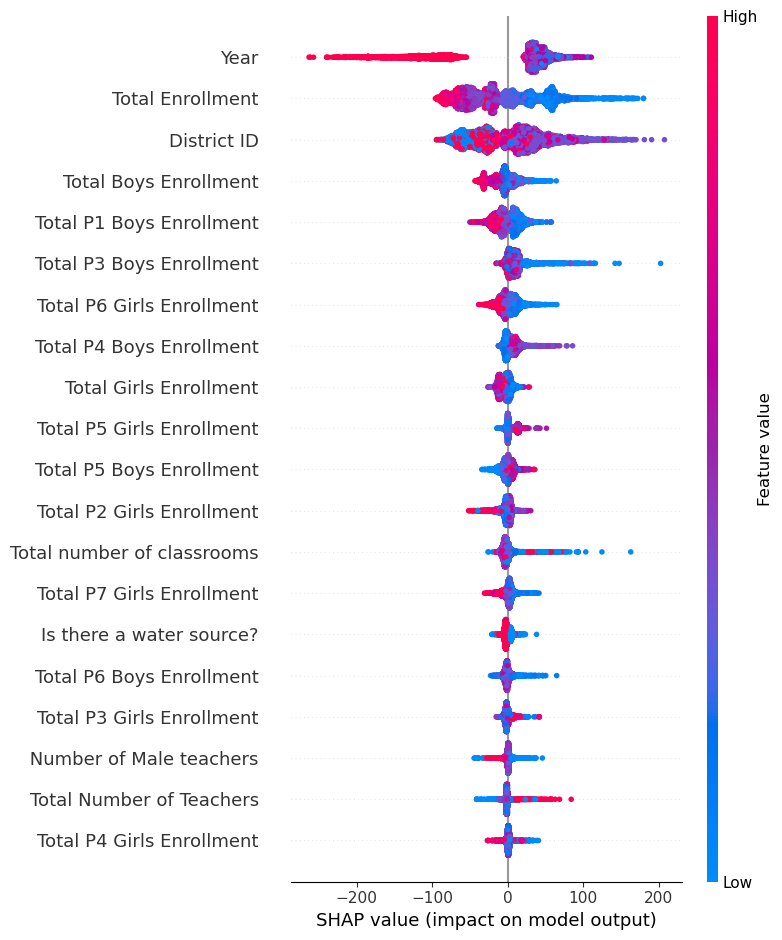

In [186]:
import shap

HGB = joblib.load('./uweso/models/GB_model.pkl')

# create an explainer object
explainer = shap.TreeExplainer(HGB)
# explainer = shap.Explainer(HGB)

# # explain a single prediction
shap_values = explainer.shap_values(tr_features)

# plot the explanation
# shap.plots.waterfall(shap_values)
# shap.force_plot(explainer.expected_value[1], shap_values[0,:], tr_features.iloc[0,:])
shap.summary_plot(shap_values, X_train)

## Evaluate best model on test set

In [188]:
simple_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
simple_imputer.fit(te_features)
te_features = simple_imputer.transform(te_features)
evaluate_model('Hist Gradient Boosting Regressor', models['GB'], te_features, te_labels)

Hist Gradient Boosting Regressor -- MAE: 111.093 / MSE: 38598.038 / R^2: 0.267 / Latency: 17.9ms
